# Analysis of Anscombe's Quartet Dataset

### Introduction

Visualization of a dataset might not provide accurate values as statistics do, but it helps in understanding the behaviour of the dataset or population much better than the numerical methods do. In the past, statisticians used to believe that usage of graphs is not ideal in statistics, as numerical calculations only can find accurate solutions.

Francis Anscombe published a paper titled Graphs in Statistical Analysis in the year 1973. This paper was published to demonstrate the usefulness of the graphs in statistical analysis.

### Graphs in Statistical Analysis

In this paper, Francis Anscombe states "Graphs are essential to good statistical analysis". He suggests that the computer should perform both numerical calculations and graphical analysis and outcome from both methods should be studied to understand the data.
He then illustrated some of the points explained in paper with the help of a table of numbers. The table contains a set of 4 data sets, hence called by the name Anscombe's Quartet. These numbers seems to have similar statistical properties, each consisting of eleven (x,y) points. Francis created this dataset to demonstrate how graphing the data can help in analysis of dataset and its importance in understanding the statistical properties.

#### Anscombe's Quartet Dataset

The below figure shows the Anscombe's dataset from the Graphs in Statistical Analysis. The first three datasets in the below table have different dependant variable y values against one independant x variable value.

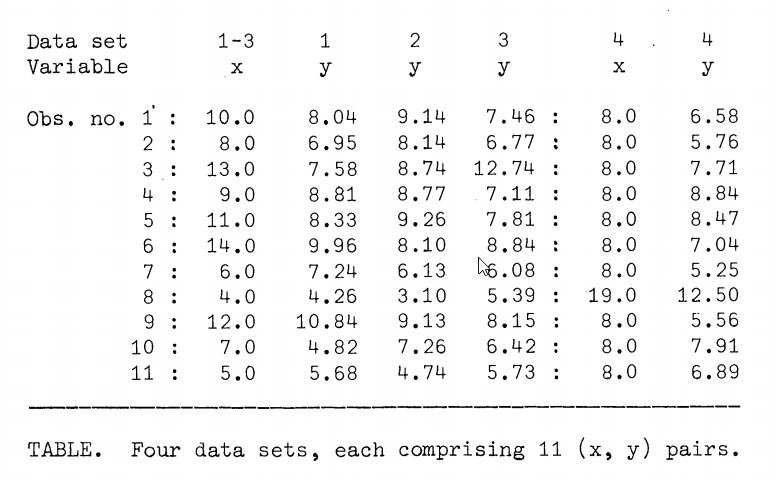

The numerical analysis of the above 11 observations produced same standard output across the four datasets.

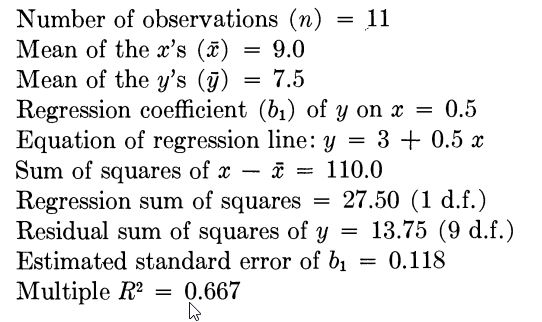

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

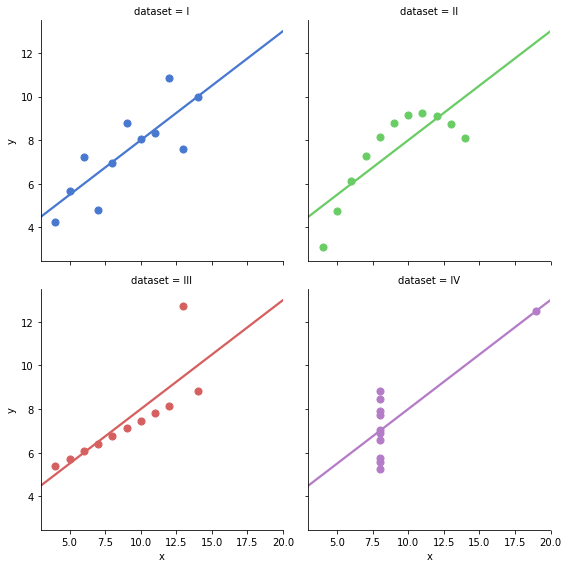

In [20]:
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
dtset = sbn.load_dataset("anscombe")
print(dtset)
#arrangedSet = dtset.groupby('dataset')
#agg1 = dtset.groupby('dataset').agg().transpose()
#print(agg1)

# Show the results of a linear regression within each dataset
sbn.lmplot(x="x", y="y", col="dataset", hue="dataset", data=dtset,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.show()

### References
http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf
https://en.wikipedia.org/wiki/Anscombe%27s_quartet
https://www.oreilly.com/library/view/python-data-analysis/9781785282287/ch02s02.html
https://gist.github.com/endolith/3299951
http://methodmatters.blogspot.com/2018/01/anscombes-quartet-1980s-edition.html
https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.transpose.html
https://www.safaribooksonline.com/library/view/python-data-analysis/9781785282287/ch02s02.html
https://seaborn.pydata.org/examples/anscombes_quartet.html
https://data.world/vikjam/anscombes-quartet/workspace/file?filename=plot-quartet.ipynb
https://rstudio-pubs-static.s3.amazonaws.com/52381_36ec82827e4b476fb968d9143aec7c4f.html